# I] Import and options


In [5]:
import pandas, numpy, seaborn, scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# have text as text and not curve in .svg
matplotlib.rcParams['svg.fonttype'] = 'none'
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':24, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(12, 8)})

In [6]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] DL data

In [7]:
df = pandas.read_csv('wbs_dmso.tsv', sep = "\t")
df

,index,flag_actin,p62_actin,lc3_actin
0,ATG7,0.628593,0.332326,1.958017
1,ATG7,1.198695,0.642068,1.353481
2,ATG7,0.866066,0.399830,1.005349
3,ATG7-/-,0.130909,0.576838,0.147086
4,ATG7-/-,0.085066,1.024921,0.682458
5,ATG7-/-,0.222616,0.657405,0.467422
6,MEF WT,0.180522,0.344499,2.018033
7,MEF WT,0.046846,0.419058,1.191988
8,MEF WT,0.161820,0.359592,1.314440
9,dVSR,0.959698,0.721158,0.133515


findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


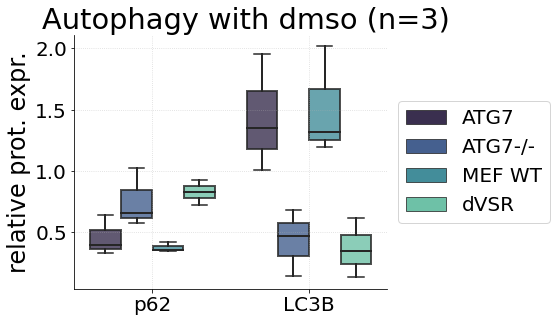

In [8]:
##Same without FLAG
# Distribution: Data preparation + graph

Data = df
Info = 'dmso'

#data preparation for graph
Data.reset_index(inplace = True, drop = True)
shape = Data.shape
shape = shape[0]
#     print(shape)

#select the sample type column
sample_type = {'sample_type':[Data.iloc[:,0][i]
  for i in range(0, shape)]}

#convert to df, and copy it 3 times
sample_typedf = pandas.DataFrame(sample_type)
sample_typedf = pandas.concat([sample_typedf,sample_typedf,sample_typedf,
                              sample_typedf,sample_typedf,sample_typedf])
sample_typedf.reset_index(drop=True, inplace=True)

# Y for expression value 
y = {'y':[Data.iloc[:,j][i]
  for j in range(2,4)
    for i in range(0, shape)]}

#create df with Y 
data_distrib = pandas.DataFrame(y)

# X for ATG7/iso1/iso2                              
data_distrib.loc[:shape,'x'] = 'p62'
data_distrib.loc[shape:,'x'] = 'LC3B'

# Will be used for Hue
data_distrib['Sample Type'] = sample_typedf['sample_type']

#graph
seaborn.catplot(x="x", y="y", hue="Sample Type", aspect= 1.2, kind="box", palette = 'mako',
                data = data_distrib, boxprops={'lw':2, 'alpha' : 0.8}, medianprops={'lw':2}, whiskerprops={'lw':2}, 
                showcaps=True, showfliers=False, legend=False)

plt.tight_layout()
plt.grid(alpha = 0.5, ls=':')
plt.ylabel('relative prot. expr.')
plt.xlabel('')
plt.title('Autophagy with '+ Info + ' (n=3)', x=.55)
plt.legend(loc='center right', fontsize=20, bbox_to_anchor=(1.55, 0.5))

In [9]:

Data = df
Info = 'dmso'

# Mann-Whitney analysis all compare to MEF WT
Data_stats = Data.sort_values(['index'], ascending = True)
Data_stats.reset_index(drop=True, inplace=True)
control_label = Data_stats.loc[6]['index']
print(Info.upper())

##p62
control_p62 = Data_stats.iloc[6:9, 2:3]
print('P62 STATS')
###ATG7-/-
statistic, pvalue = scipy.stats.mannwhitneyu(Data_stats.iloc[3:6, 2:3], control_p62)
Pvalue = "{:.5E}".format(pvalue)
print("the pvalue between", Data_stats.loc[3]['index'], "and", control_label,"is", Pvalue)
###ATG7
statistic, pvalue = scipy.stats.mannwhitneyu(Data_stats.iloc[0:3, 2:3], control_p62)
Pvalue = "{:.5E}".format(pvalue)
print("the pvalue between", Data_stats.loc[0]['index'], "and", control_label,"is", Pvalue)
###dVSR
statistic, pvalue = scipy.stats.mannwhitneyu(Data_stats.iloc[9:, 2:3], control_p62)
Pvalue = "{:.5E}".format(pvalue)
print("the pvalue between", Data_stats.loc[9]['index'], "and", control_label,"is", Pvalue)

##lC3
control_lc3 = Data_stats.iloc[6:9, 3:4]
print('LC3 STATS')
###ATG7-/-
statistic, pvalue = scipy.stats.mannwhitneyu(Data_stats.iloc[3:6, 3:4], control_lc3)
Pvalue = "{:.5E}".format(pvalue)
print("the pvalue between", Data_stats.loc[3]['index'], "and", control_label,"is", Pvalue)
###ATG7
statistic, pvalue = scipy.stats.mannwhitneyu(Data_stats.iloc[0:3, 3:4], control_lc3)
Pvalue = "{:.5E}".format(pvalue)
print("the pvalue between", Data_stats.loc[0]['index'], "and", control_label,"is", Pvalue)
###dVSR
statistic, pvalue = scipy.stats.mannwhitneyu(Data_stats.iloc[9:, 3:4], control_lc3)
Pvalue = "{:.5E}".format(pvalue)
print("the pvalue between", Data_stats.loc[9]['index'], "and", control_label,"is", Pvalue)
print()

DMSO
P62 STATS
the pvalue between ATG7-/- and MEF WT is 4.04278E-02
the pvalue between ATG7 and MEF WT is 5.00000E-01
the pvalue between dVSR and MEF WT is 4.04278E-02
LC3 STATS
the pvalue between ATG7-/- and MEF WT is 4.04278E-02
the pvalue between ATG7 and MEF WT is 5.00000E-01
the pvalue between dVSR and MEF WT is 4.04278E-02



In [10]:
#WHY DO I HAVE EXACTLY SAME RESULTS ? 

In [11]:
#For ATG7 vs Ctl 
## ATG7 value for LC3 : 
Data_stats.iloc[9:, 3:4]

,lc3_actin
9,0.133515
10,0.618526
11,0.345778


In [12]:
## ctl value for LC3 : 
control_lc3

,lc3_actin
6,2.018033
7,1.191988
8,1.314440


In [13]:
## ATG7 value for P62 : 
Data_stats.iloc[9:, 2:3]

,p62_actin
9,0.721158
10,0.924603
11,0.831016


In [14]:
## ctl value for P62 : 
control_p62

,p62_actin
6,0.344499
7,0.419058
8,0.359592


In [15]:
#Stats for LC3
statistic, pvalue = scipy.stats.mannwhitneyu(Data_stats.iloc[9:, 3:4], control_lc3)
pvalue

0.04042779918502612

In [16]:
# stat for P62
statistic, pvalue = scipy.stats.mannwhitneyu(Data_stats.iloc[9:, 2:3], control_p62)
pvalue

0.04042779918502612